# Datos de accidentes de tráfico en Madrid (2017-2018)

**Fuente**: [datos.madrid.es](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7c2843010d9c3610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)

### Autores:
- Nelson Saturno
- Pablo Nieto

## Descripción

Datos en los ficheros:

- FECHA: formato dd/mm/aaaa
- RANGO HORARIO: rango horario en el que ocurrió el accidente.
- DIA SEMANA
- DISTRITO
- LUGAR ACCIDENTE
- Nº: número de la calle (sólo si tiene sentido).
- Nº PARTE: identificador del accidente. Si distintos registros tienen el mismo número parte, se trata del mismo accidente donde hay varios afectados.
- CPFA Granizo: condiciones ambientales que se dan en el momento del siniestro, granizo.
- CPFA Hielo: condiciones ambientales que se dan en el momento del siniestro, hielo.
- CPFA Lluvia: condiciones ambientales que se dan en el momento del siniestro, lluvia.
- CPFA Niebla: condiciones ambientales que se dan en el momento del siniestro, niebla.
- CPFA Seco: condiciones ambientales que se dan en el momento del siniestro, seco.
- CPFA Nieve: condiciones ambientales que se dan en el momento del siniestro, nieve.
- CPSV Mojada: circunstancias que afectan el estado de la vía en el momento de producirse el siniestro, mojada.
- CPSV Aceite: circunstancias que afectan el estado de la vía en el momento de producirse el siniestro, aceite.
- CPSV Barro: circunstancias que afectan el estado de la vía en el momento de producirse el siniestro, barro.
- CPSV Grava Suelta: circunstancias que afectan el estado de la vía en el momento de producirse el siniestro, grava suelta.
- CPSV Hielo: circunstancias que afectan el estado de la vía en el momento de producirse el siniestro, hielo.
- CPSV Seca Y Limpia: circunstancias que afectan el estado de la vía en el momento de producirse el siniestro, seca y limpia.
- Nº VICTIMAS
- TIPO ACCIDENTE: colisión doble, colisión múltiple, choque con objeto fijo, atropello, vuelco, caída motocicleta, caída ciclomotor, caída bicicleta, caída viajero bus.
- Tipo Vehiculo
- TIPO PERSONA: Conductor, peatón, testigo o viajero.
- SEXO: hombre, mujer o no asignado
- LESIVIDAD: muerto, herido grave, herido leve, ileso
- Tramo Edad

---
### Carga de datos

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Se cargan los datos y se renombran todas las columnas
new_names = [
    'fecha', 'rango_horario', 'dia_semana', 'distrito',
    'lugar_accidente', 'num_calle', 'num_parte', 'fa_granizo',
    'fa_hielo', 'fa_lluvia', 'fa_niebla', 'fa_seco', 'fa_nieve',
    'sv_mojado', 'sv_aceite', 'sv_barro', 'sv_grava_suelta',
    'sv_hielo', 'sv_seca_limpia', 'num_victimas', 'tipo_accidente',
    'tipo_vehiculo', 'tipo_persona', 'sexo', 'lesividad', 'tramo_edad'
]

# Datos para 2017
df_accidents_2017 = pd.read_excel(
    'https://datos.madrid.es/egob/catalogo/300228-1-accidentes-trafico-detalle.xlsx',
    skiprows=0, names=new_names
)

# Datos para 2018
df_accidents_2018 = pd.read_excel(
    'https://datos.madrid.es/egob/catalogo/300228-0-accidentes-trafico-detalle.xlsx',
    skiprows=0, names=new_names
)

# Unión de datos 2017-2018
df_all_accidents = pd.concat([df_accidents_2017, df_accidents_2018], sort=False)

#Limpiezas
df_all_accidents['tramo_edad']=df_all_accidents['tramo_edad'].str.replace('DE 6 A 9 AÑOS','DE 06 A 9 AÑOS')
df_all_accidents['tipo_accidente']=df_all_accidents['tipo_accidente'].str.strip()
df_all_accidents['tipo_vehiculo']=df_all_accidents['tipo_vehiculo'].str.strip()
df_all_accidents['rango_horario']=df_all_accidents['rango_horario'].str.replace(' 1:',' 01:')
df_all_accidents['rango_horario']=df_all_accidents['rango_horario'].str.replace(' 2:',' 02:')
df_all_accidents['rango_horario']=df_all_accidents['rango_horario'].str.replace(' 3:',' 03:')
df_all_accidents['rango_horario']=df_all_accidents['rango_horario'].str.replace(' 4:',' 04:')
df_all_accidents['rango_horario']=df_all_accidents['rango_horario'].str.replace(' 5:',' 05:')
df_all_accidents['rango_horario']=df_all_accidents['rango_horario'].str.replace(' 6:',' 06:')
df_all_accidents['rango_horario']=df_all_accidents['rango_horario'].str.replace(' 7:',' 07:')
df_all_accidents['rango_horario']=df_all_accidents['rango_horario'].str.replace(' 8:',' 08:')
df_all_accidents['rango_horario']=df_all_accidents['rango_horario'].str.replace(' 9:',' 09:')

df_all_accidents

,fecha,rango_horario,dia_semana,distrito,lugar_accidente,num_calle,num_parte,fa_granizo,fa_hielo,fa_lluvia,...,sv_grava_suelta,sv_hielo,sv_seca_limpia,num_victimas,tipo_accidente,tipo_vehiculo,tipo_persona,sexo,lesividad,tramo_edad
0,2017-01-01,DE 01:00 A 01:59,DOMINGO,VILLA DE VALLECAS,AVENIDA DEL MAYORAZGO NUM ...,26,2017/76,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,FURGONETA,CONDUCTOR,HOMBRE,IL,DE 25 A 29 AÑOS
1,2017-01-01,DE 01:00 A 01:59,DOMINGO,VILLA DE VALLECAS,AVENIDA DEL MAYORAZGO NUM ...,26,2017/76,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,FURGONETA,CONDUCTOR,MUJER,HL,DE 30 A 34 ANOS
2,2017-01-01,DE 02:00 A 02:59,DOMINGO,VILLAVERDE,CALLE DE SANTA JOAQUINA DE VEDRUNA NUM ...,3,2017/1,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,CONDUCTOR,HOMBRE,HG,DE 21 A 24 AÑOS
3,2017-01-01,DE 05:00 A 05:59,DOMINGO,ARGANZUELA,CALLE 30 15RA KM. ...,30,2017/30,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,CONDUCTOR,MUJER,HL,DE 45 A 49 AÑOS
4,2017-01-01,DE 05:00 A 05:59,DOMINGO,ARGANZUELA,CALLE 30 15RA KM. ...,30,2017/30,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,VIAJERO,MUJER,IL,DE 10 A 14 AÑOS
5,2017-01-01,DE 06:00 A 06:59,DOMINGO,ARGANZUELA,CALLE DE TOLEDO NUM ...,120,2017/88,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,NO ASIGNADO,TESTIGO,HOMBRE,IL,DE 21 A 24 AÑOS
6,2017-01-01,DE 06:00 A 06:59,DOMINGO,ARGANZUELA,CALLE DE TOLEDO NUM ...,120,2017/88,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA
7,2017-01-01,DE 06:00 A 06:59,DOMINGO,ARGANZUELA,CALLE DE TOLEDO NUM ...,120,2017/88,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,BICICLETA,CONDUCTOR,MUJER,HG,DE 21 A 24 AÑOS
8,2017-01-01,DE 07:00 A 07:59,DOMINGO,PUENTE DE VALLECAS,AVENIDA DE LA ALBUFERA - AVENIDA DE LA DEMOCRA...,0,2017/245,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA
9,2017-01-01,DE 07:00 A 07:59,DOMINGO,PUENTE DE VALLECAS,AVENIDA DE LA ALBUFERA - AVENIDA DE LA DEMOCRA...,0,2017/245,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,AUTO-TAXI,CONDUCTOR,HOMBRE,HL,DE 50 A 54 AÑOS


---
#### Víctimas por accidente

In [9]:
s_num_victims_by_accident = df_all_accidents.groupby(['num_parte'])['num_victimas'].sum()


---
#### Accidentes sin factores climáticos desfavorables

In [11]:
df_best_weather = df_all_accidents[
    (df_all_accidents['sv_seca_limpia'] == 'SI') & (df_all_accidents['fa_seco'] == 'SI')
]

---
####  Accidentes ocurridos en días de semana

In [146]:
weekdays = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES']

df_accidents_on_weekdays = df_all_accidents[df_all_accidents['dia_semana'].isin(weekdays)]

---
#### Accidentes por distrito y por año

In [13]:
df_accidents_by_district = pd.pivot_table(
    df_all_accidents, index=['distrito'], columns=[df_all_accidents['fecha'].dt.year],
    aggfunc=pd.Series.nunique, values='num_parte'
)

# Se verifica que el resultado es correcto
if not df_accidents_by_district[2017].sum() == df_accidents_2017['num_parte'].nunique():
    raise Exception("Error para el año 2017")
if not df_accidents_by_district[2018].sum() == df_accidents_2018['num_parte'].nunique():
    raise Exception("Error para el año 2018")

---
### Número de personas afectadas por año y por lesividad

In [14]:
# Renombramiento de valores de la columna 'lesividad' en una nueva columna
def readable_injury(value):
    injury = {
        'IL': 'ILESO',
        'HL': 'HERIDO LEVE',
        'HG': 'HERIDO GRAVE',
        'MT': 'MUERTO'
    }
    return injury.setdefault(value, 'NO ASIGNADA')


df_all_accidents['tipo_lesividad'] = df_all_accidents['lesividad'].apply(readable_injury)

# Número de personas por tipo de lesividad calculado por año
df_injuries_by_year = pd.pivot_table(
    df_all_accidents, index=['lesividad'], columns=[df_all_accidents['fecha'].dt.year],
    aggfunc='sum', values='num_victimas'
)

print(df_injuries_by_year)

# Se verifica el resultado
if not df_accidents_2017['num_victimas'].sum() == df_injuries_by_year[2017].sum():
    raise Exception("Error para el año 2017")
if not df_accidents_2018['num_victimas'].sum() == df_injuries_by_year[2018].sum():
    raise Exception("Error para el año 2018")

fecha                                      2017   2018
lesividad                                             
HG                                         1397   1011
HL                                        20174  18046
IL                                        19667  16461
MT                                           35     46
NO ASIGNADA                                1361   1208


### ACCIDENTES POR SEXO

In [92]:
import matplotlib.pyplot as plt

In [86]:

df_sexo=df_all_accidents.groupby(['sexo'])['fecha'].count().reset_index().rename(columns={'fecha' : 'Total'})
df_sexo

,sexo,Total
0,HOMBRE,34542
1,MUJER,17791
2,NO ASIGNADO,2602


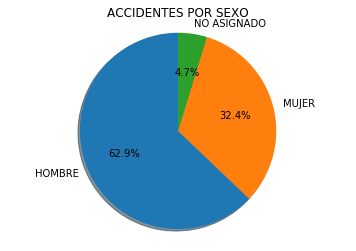

In [96]:
fig, ax = plt.subplots()
ax.pie(df_sexo.Total, labels=df_sexo.sexo, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.set_title('ACCIDENTES POR SEXO')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### VICTIMAS POR TIPO DE ACIDENTE Y EDAD

In [73]:
df_edad_victim_tipo=df_all_accidents.groupby(['tipo_accidente','tramo_edad'])['fecha'].count().reset_index().rename(columns={'fecha': 'Total'})

In [99]:
df_edad_victim_tipo

,tipo_accidente,tramo_edad,Total
0,ATROPELLO,DE 0 A 5 AÑOS,141
1,ATROPELLO,DE 06 A 9 AÑOS,124
2,ATROPELLO,DE 10 A 14 AÑOS,148
3,ATROPELLO,DE 15 A 17 AÑOS,137
4,ATROPELLO,DE 18 A 20 AÑOS,300
5,ATROPELLO,DE 21 A 24 AÑOS,423
6,ATROPELLO,DE 25 A 29 AÑOS,672
7,ATROPELLO,DE 30 A 34 ANOS,686
8,ATROPELLO,DE 35 A 39 AÑOS,728
9,ATROPELLO,DE 40 A 44 AÑOS,813


In [79]:
df_edad_victim_tipo[df_edad_victim_tipo.tipo_accidente=='ATROPELLO'].sort_values(by='Total',ascending=False)

,tipo_accidente,tramo_edad,Total
9,ATROPELLO,DE 40 A 44 AÑOS,813
8,ATROPELLO,DE 35 A 39 AÑOS,728
10,ATROPELLO,DE 45 A 49 AÑOS,722
7,ATROPELLO,DE 30 A 34 ANOS,686
11,ATROPELLO,DE 50 A 54 AÑOS,676
6,ATROPELLO,DE 25 A 29 AÑOS,672
17,ATROPELLO,DESCONOCIDA,664
16,ATROPELLO,DE MAS DE 74 AÑOS,601
12,ATROPELLO,DE 55 A 59 AÑOS,514
5,ATROPELLO,DE 21 A 24 AÑOS,423


### Incidentes por tipo de vehículo

In [85]:
df_tipo_vehi=df_all_accidents.groupby(['tipo_vehiculo'])['fecha'].count().reset_index().rename(columns={'fecha': 'Total'}).sort_values(by='Total',ascending=False)
df_tipo_vehi

,tipo_vehiculo,Total
9,TURISMO,27911
8,NO ASIGNADO,9891
7,MOTOCICLETA,8148
6,FURGONETA,2171
2,AUTOBUS-AUTOCAR,1705
1,AUTO-TAXI,1515
3,BICICLETA,1361
5,CICLOMOTOR,1212
4,CAMION,503
10,VARIOS,381


### Acciedentes en bici agrupados por tipo y lesividad

In [108]:
df_all_accidents['tipo_vehiculo']=df_all_accidents['tipo_vehiculo'].str.strip()
df_bici=df_all_accidents[df_all_accidents.tipo_vehiculo=='BICICLETA']

In [109]:
df_bici_lesion=df_bici.groupby(['lesividad','tipo_accidente'])['fecha'].count().reset_index().rename(columns={'fecha': 'Total'}).sort_values(by='Total',ascending=False)
df_bici_lesion

,lesividad,tipo_accidente,Total
7,HL,COLISIÓN DOBLE,560
5,HL,CAÍDA BICICLETA,497
9,IL,ATROPELLO,78
3,HG,COLISIÓN DOBLE,59
1,HG,CAÍDA BICICLETA,46
4,HL,ATROPELLO,32
6,HL,CHOQUE CON OBJETO FIJO,25
13,IL,COLISIÓN DOBLE,20
16,NO ASIGNADA,ATROPELLO,10
11,IL,CAÍDA MOTOCICLETA,8


### Horarios de accidentes

In [147]:
df_horarios=df_accidents_on_weekdays.groupby(['dia_semana','rango_horario'])['fecha'].count().reset_index().rename(columns={'fecha': 'Total'})


In [236]:
lunes=df_horarios[df_horarios.dia_semana=='LUNES']['Total'].rename(columns={'Total' : 'lunes'}).reset_index()[0]
martes=df_horarios[df_horarios.dia_semana=='MARTES']['Total'].rename(columns={'Total' : 'martes'}).reset_index()[0]
miercoles=df_horarios[df_horarios.dia_semana=='MIERCOLES']['Total'].rename(columns={'Total' : 'miercoles'}).reset_index()[0]
jueves=df_horarios[df_horarios.dia_semana=='JUEVES']['Total'].rename(columns={'Total' : 'jueves'}).reset_index()[0]
viernes=df_horarios[df_horarios.dia_semana=='VIERNES']['Total'].rename(columns={'Total' : 'viernes'}).reset_index()[0]
#horarios=np.sort(df_horarios['rango_horario'].unique())
horarios=range(0,24)
df_plot=pd.DataFrame({'horarios': horarios, 'lunes':lunes, 'martes':martes,'miercoles':miercoles,'jueves':jueves,'viernes':viernes})

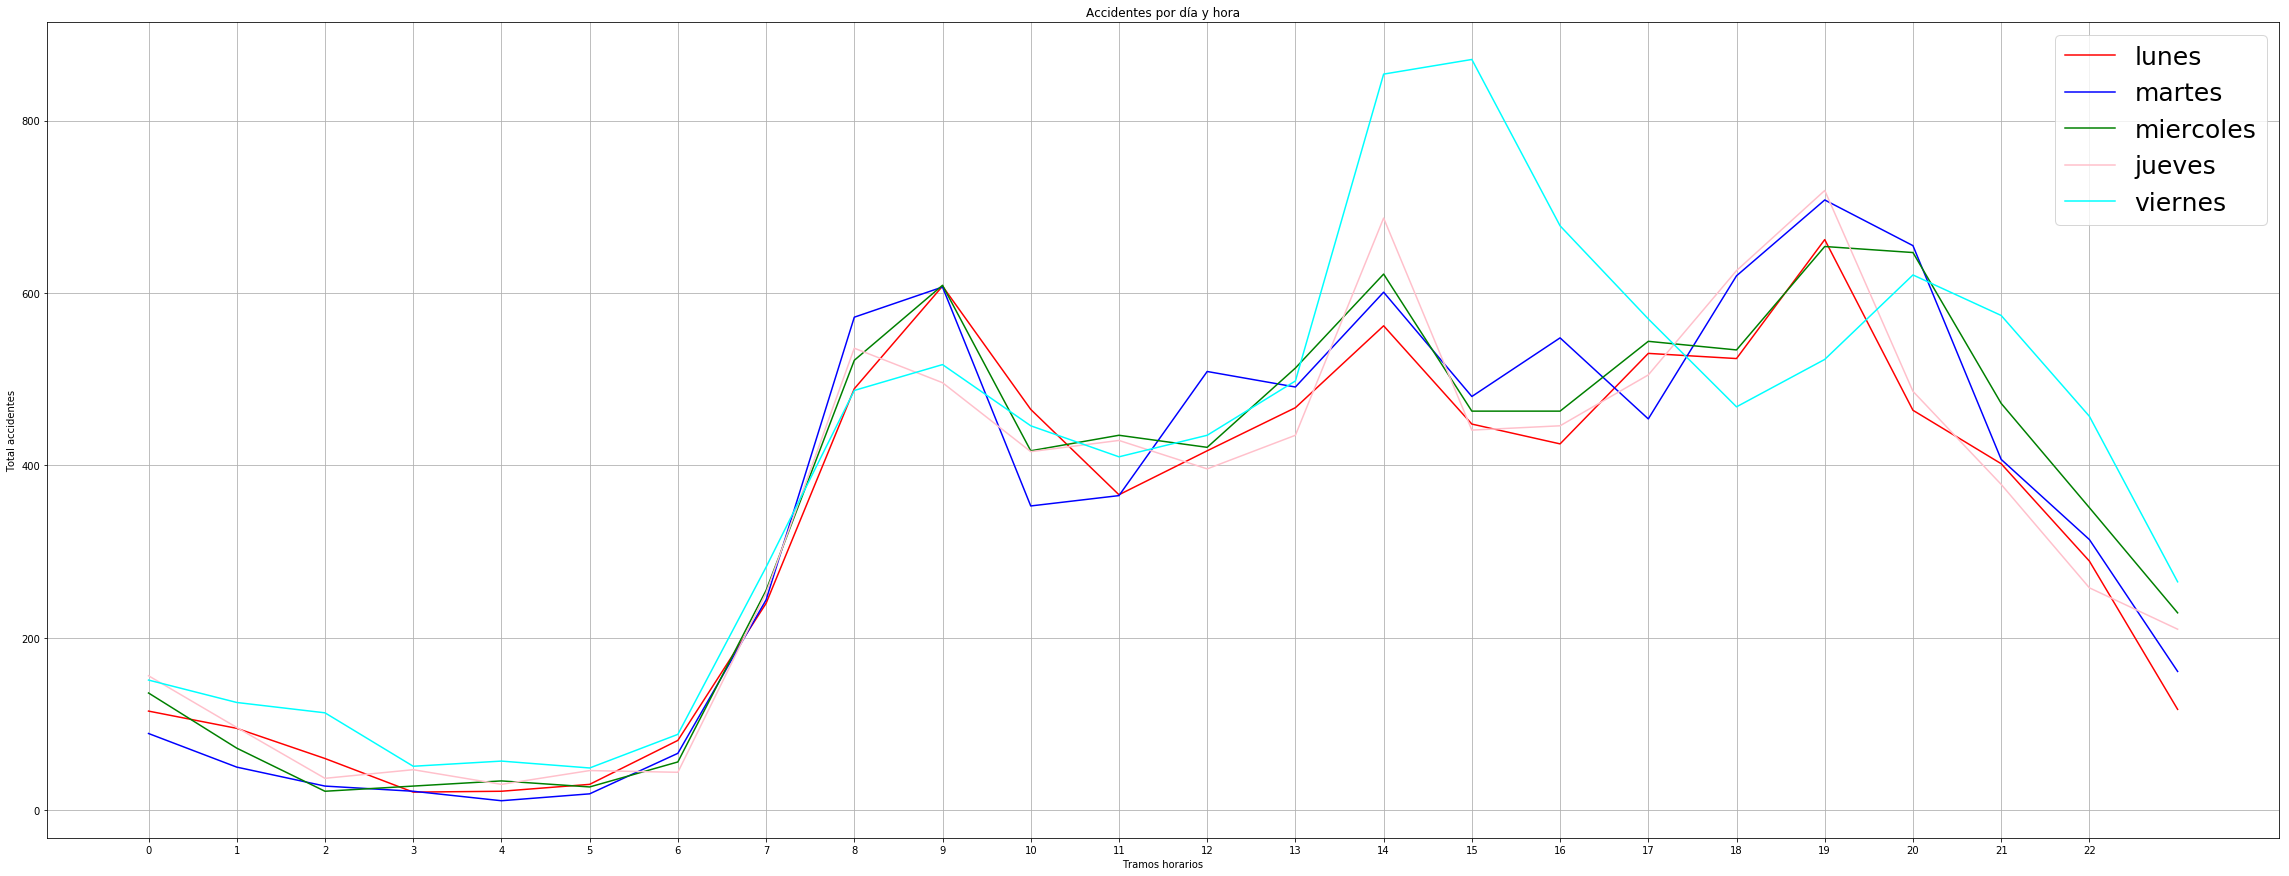

In [252]:
fig, ax=plt.subplots(figsize=(40,15))
ax.plot(horarios,lunes,color='red',label='lunes')
ax.plot(horarios,martes,color='blue',label='martes')
ax.plot(horarios,miercoles,color='green',label='miercoles')
ax.plot(horarios,jueves,color='pink',label='jueves')
ax.plot(horarios,viernes,color='cyan',label='viernes')

ax.set_title('Accidentes por día y hora')
ax.set_xlabel('Tramos horarios')
ax.set_ylabel('Total accidentes')
ax.grid(True)

major_ticks = np.arange(0, 23, 1)
ax.set_xticks(major_ticks)



plt.legend(prop={'size': 25})
plt.show()